In [1]:
#importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#House price Prediction
#Case Study
#Regression 
#Build API
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

In [3]:
import sklearn
sklearn.__version__

'1.1.3'

In [4]:
d=load_boston()
print(type(d))
print(d.keys)

<class 'sklearn.utils._bunch.Bunch'>
<built-in method keys of Bunch object at 0x0000019F30A666B0>


In [5]:
d.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [6]:
print(d.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
#creating a dataframe to map indepedent variables and dependent variable
boston_data = pd.DataFrame(d.data, columns=d.feature_names)
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
#align the target to our dataframe
boston_data['Price']= d.target
boston_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


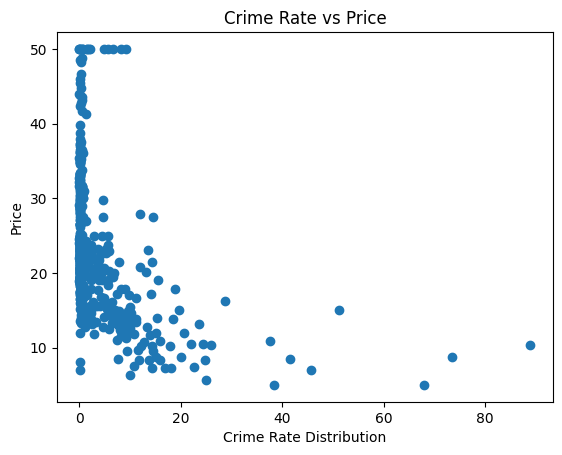

In [9]:
#Visualization to get better insights
plt.scatter(boston_data['CRIM'],boston_data['Price'])
plt.xlabel("Crime Rate Distribution")
plt.ylabel("Price")
plt.title("Crime Rate vs Price")
plt.show()

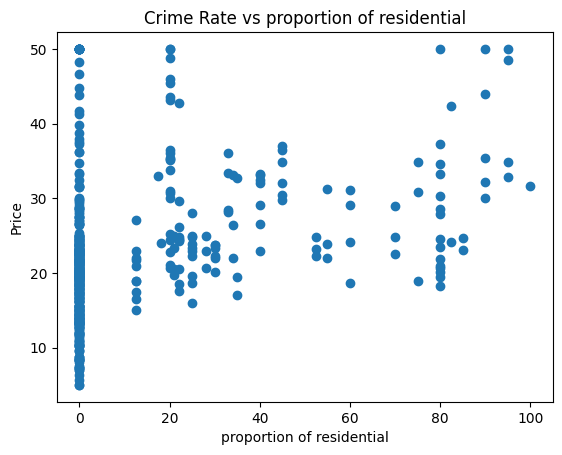

In [10]:
plt.scatter(boston_data['ZN'],boston_data['Price'])
plt.xlabel("proportion of residential")
plt.ylabel("Price")
plt.title("Crime Rate vs proportion of residential")
plt.show()

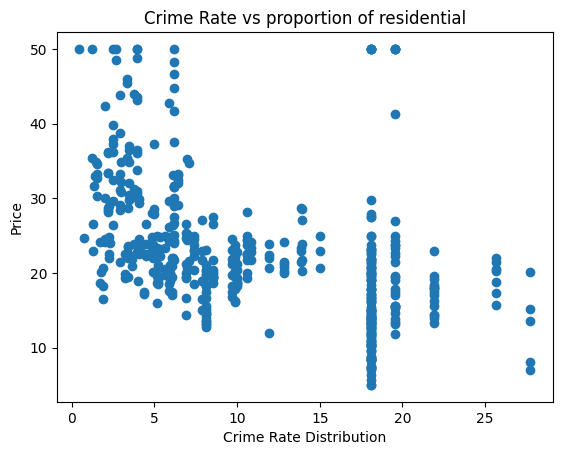

In [11]:
plt.scatter(boston_data['INDUS'],boston_data['Price'])
plt.xlabel("Crime Rate Distribution")
plt.ylabel("Price")
plt.title("Crime Rate vs proportion of residential")
plt.show()

In [12]:
#check the correlation with the features
boston_data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [13]:
boston_data.corr().round(2) 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [14]:
#split the data into training and testing part
from sklearn.model_selection import train_test_split

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
#divide the data into dependent and independent variables
X = boston_data.iloc[:,:-1]
Y = boston_data.iloc[:, -1]

In [17]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [18]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [20]:
print(x_train)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
13   0.62976   0.0   8.14   0.0  0.538  5.949  61.8  4.7075   4.0  307.0   
61   0.17171  25.0   5.13   0.0  0.453  5.966  93.4  6.8185   8.0  284.0   
377  9.82349   0.0  18.10   0.0  0.671  6.794  98.8  1.3580  24.0  666.0   
39   0.02763  75.0   2.95   0.0  0.428  6.595  21.8  5.4011   3.0  252.0   
365  4.55587   0.0  18.10   0.0  0.718  3.561  87.9  1.6132  24.0  666.0   
..       ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
255  0.03548  80.0   3.64   0.0  0.392  5.876  19.1  9.2203   1.0  315.0   
72   0.09164   0.0  10.81   0.0  0.413  6.065   7.8  5.2873   4.0  305.0   
396  5.87205   0.0  18.10   0.0  0.693  6.405  96.0  1.6768  24.0  666.0   
235  0.33045   0.0   6.20   0.0  0.507  6.086  61.5  3.6519   8.0  307.0   
37   0.08014   0.0   5.96   0.0  0.499  5.850  41.5  3.9342   5.0  279.0   

     PTRATIO       B  LSTAT  
13      21.0  396.90   8.26  
61      19.7  378.08  14.44

In [21]:
print(x_test)

        CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
307  0.04932  33.0   2.18   0.0  0.472  6.849   70.3  3.1827   7.0  222.0   
343  0.02543  55.0   3.78   0.0  0.484  6.696   56.4  5.7321   5.0  370.0   
47   0.22927   0.0   6.91   0.0  0.448  6.030   85.5  5.6894   3.0  233.0   
67   0.05789  12.5   6.07   0.0  0.409  5.878   21.4  6.4980   4.0  345.0   
362  3.67822   0.0  18.10   0.0  0.770  5.362   96.2  2.1036  24.0  666.0   
..       ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
467  4.42228   0.0  18.10   0.0  0.584  6.003   94.5  2.5403  24.0  666.0   
95   0.12204   0.0   2.89   0.0  0.445  6.625   57.8  3.4952   2.0  276.0   
122  0.09299   0.0  25.65   0.0  0.581  5.961   92.9  2.0869   2.0  188.0   
260  0.54011  20.0   3.97   0.0  0.647  7.203   81.8  2.1121   5.0  264.0   
23   0.98843   0.0   8.14   0.0  0.538  5.813  100.0  4.0952   4.0  307.0   

     PTRATIO       B  LSTAT  
307     18.4  396.90   7.53  
343     17.6  3

In [22]:
print(y_train)

13     20.4
61     16.0
377    13.3
39     30.8
365    27.5
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: Price, Length: 354, dtype: float64


In [23]:
print(y_test)

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
467    19.1
95     28.4
122    20.5
260    33.8
23     14.5
Name: Price, Length: 152, dtype: float64


In [24]:
#building the model
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [25]:
#Create a table showing the coefficient (influence) of each of the columns
cdf = pd.DataFrame(lin_reg.coef_,index= x_train.columns,columns=['Cofficients'])
cdf

,Cofficients
CRIM,-0.098542
ZN,0.060784
INDUS,0.059172
CHAS,2.439560
NOX,-21.469965
RM,2.795814
AGE,0.003575
DIS,-1.516272
RAD,0.307542
TAX,-0.011280


In [26]:
#Feature Scaling is to be done to make each column standard
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [28]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [29]:
#Create a table showing the coefficient (influence) of each of the columns
cdf = pd.DataFrame(lin_reg.coef_,index=d.feature_names,columns=['Cofficients'])
cdf

,Cofficients
CRIM,-0.098542
ZN,0.060784
INDUS,0.059172
CHAS,2.439560
NOX,-21.469965
RM,2.795814
AGE,0.003575
DIS,-1.516272
RAD,0.307542
TAX,-0.011280


In [30]:
#then we go for prediction and calculate the metrics
reg_predict = lin_reg.predict(x_test)

In [32]:
#R-Squared value -->coefficient of Determination
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,reg_predict))
print(r2_score(y_test,reg_predict)*100)

885.1191107636964
-865.7127967784005


In [33]:
#Go for predictions by passing our input 
X.iloc[0];Y[0]

24.0

In [34]:
#let's check what our model has given
lin_reg.predict(X.iloc[[0]])

array([29.80211995])

In [35]:
#For sure target will be negative as feature scaling to be done
#As you can observe price is negative we need to scale it
scaled=lin_reg.predict(scaler.transform(X.iloc[[0]]))
scaled

array([51.20486626])

In [37]:
# once we are confident enough to test the model in production-ready environment
#will save the models using pickle
import pickle

In [38]:
#we will create pickle files for both regressionmodel and scaling model
#open() is generally for File modes
pickle.dump(lin_reg,open('regmodel.pkl','wb'))

In [39]:
#same way we create another pickle file for scaling model
pickle.dump(scaler,open('scaler.pkl','wb'))

In [40]:
#now let's gibe some validation data and test on pickle files
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [41]:
#do same for transformation
f = pickle.load(open('scaler.pkl','rb'))

In [42]:
#as we have successfully loaded the picklefiles will pass data
pickled_model.predict(f.transform(X.iloc[[0]]))

array([51.20486626])